In [1]:
import ROOT
import numpy as np
from root_utils_v2 import AGC_Sample, RebinningTool, MuteTool, Visualization, DrawModel

C system headers (glibc/Xcode/Windows SDK) must be installed.
In file included from input_line_4:36:
/home/vkholoim/micromamba/envs/empty/bin/../lib/gcc/x86_64-conda-linux-gnu/12.4.0/include/c++/cassert:44:10: fatal error: 'assert.h' file not found
#include <assert.h>
         ^~~~~~~~~~
input_line_35:1:10: fatal error: 'dlfcn.h' file not found
#include "dlfcn.h"
         ^~~~~~~~~
In file included from input_line_45:1:
/home/vkholoim/micromamba/envs/empty/include/CPyCppyy/API.h:15:10: fatal error: 'stdio.h' file not found
#include <stdio.h>
         ^~~~~~~~~


TypeError: no python-side overrides supported (failed to include Python.h)

In [ ]:
MuteTool() # Mute all the messages from minimizer

In [ ]:
rebinning_tool = RebinningTool() # Rebinning as extra step (was discussed with Jonas)
rebinning_tool.set_xmin(110)
rebinning_tool.set_rebin(2)
rebinning_tool.set_input_path("data/histograms.root")
rebinning_tool.set_output_path("data/temp_histos.root") # if you dont specify this -> overwrite (?)
rebinning_tool.apply_rebinning()

In [ ]:
file = ROOT.TFile("ROOT_AGC_Utils/HistFactoryExtra.root", "RECREATE") # should be hidden. Cleaning the file
file.Close() # create separate file for each file -> two much files

input_file = "data/temp_histos.root" # input file for futher defined histograms

In [ ]:
meas = ROOT.RooStats.HistFactory.Measurement("meas", "meas")
meas.SetLumi(1.0)
meas.SetLumiRelErr(0.0)

# ! main difference
lumi_systematics = ROOT.RooStats.HistFactory.OverallSys() # we define it one time -> dont need to redefine it
lumi_systematics.SetName("Lumi")
lumi_systematics.SetLow(0.97)
lumi_systematics.SetHigh(1.03)

In [ ]:
channel = ROOT.RooStats.HistFactory.Channel("channel_4j1b_CR")
channel.SetData("4j1b_pseudodata", input_file)
channel.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "4j1b_ttbar", input_file)
ttbar.SetSystematicsInputFile(input_file)   # if use SetInputFile -> change input file for nominal histogram 
                                            # we can put input file from sample data definition as default

ttbar.AddOverallSys(lumi_systematics)
ttbar.ActivateStatError() # ROOT does not have DisableStatError() method, so we have to keep this :(
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "4j1b_ttbar_ME_var"                                                          ) # "histogram_up" can be skipped here
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "4j1b_ttbar_PS_var"                                                          ) # histogram path is specified as "" in default case
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "4j1b_ttbar_scaleup",        histoname_down = "4j1b_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j1b_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j1b_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j1b_ttbar_btag_var_0_up",  histoname_down = "4j1b_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j1b_ttbar_btag_var_1_up",  histoname_down = "4j1b_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j1b_ttbar_btag_var_2_up",  histoname_down = "4j1b_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j1b_ttbar_btag_var_3_up",  histoname_down = "4j1b_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel.AddSample(ttbar)

wjets = AGC_Sample("wjets", "4j1b_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "4j1b_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "4j1b_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "4j1b_wjets_btag_var_0_up",  histoname_down = "4j1b_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "4j1b_wjets_btag_var_1_up",  histoname_down = "4j1b_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "4j1b_wjets_btag_var_2_up",  histoname_down = "4j1b_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "4j1b_wjets_btag_var_3_up",  histoname_down = "4j1b_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "4j1b_wjets_scale_var_up",   histoname_down = "4j1b_wjets_scale_var_down"    )
channel.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "4j1b_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j1b_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j1b_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j1b_single_top_s_chan_btag_var_0_up",  histoname_down = "4j1b_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j1b_single_top_s_chan_btag_var_1_up",  histoname_down = "4j1b_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j1b_single_top_s_chan_btag_var_2_up",  histoname_down = "4j1b_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j1b_single_top_s_chan_btag_var_3_up",  histoname_down = "4j1b_single_top_s_chan_btag_var_3_down"   )

channel.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "4j1b_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j1b_single_top_t_chan_pt_scale_up"                                                              )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j1b_single_top_t_chan_pt_res_up"                                                                )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j1b_single_top_t_chan_btag_var_0_up",  histoname_down = "4j1b_single_top_t_chan_btag_var_0_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j1b_single_top_t_chan_btag_var_1_up",  histoname_down = "4j1b_single_top_t_chan_btag_var_1_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j1b_single_top_t_chan_btag_var_2_up",  histoname_down = "4j1b_single_top_t_chan_btag_var_2_down")
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j1b_single_top_t_chan_btag_var_3_up",  histoname_down = "4j1b_single_top_t_chan_btag_var_3_down")

channel.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "4j1b_single_top_tW", input_file)
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.ActivateStatError()
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j1b_single_top_tW_pt_scale_up"                                                                 )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up =  "4j1b_single_top_tW_pt_res_up"                                                                  )               
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j1b_single_top_tW_btag_var_0_up",      histoname_down = "4j1b_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j1b_single_top_tW_btag_var_1_up",      histoname_down = "4j1b_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j1b_single_top_tW_btag_var_2_up",      histoname_down = "4j1b_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j1b_single_top_tW_btag_var_3_up",      histoname_down = "4j1b_single_top_tW_btag_var_3_down"   )

channel.AddSample(single_top_tW)

meas.AddChannel(channel)

channel_2b = ROOT.RooStats.HistFactory.Channel("channel_4j2b_SR")
channel_2b.SetData("4j2b_pseudodata", input_file)
channel_2b.SetStatErrorConfig(0.001, "Gaussian")

ttbar = AGC_Sample("ttbar", "4j2b_ttbar", input_file)
ttbar.AddOverallSys(lumi_systematics)
ttbar.SetSystematicsInputFile(input_file)
ttbar.ActivateStatError()
ttbar.AddNormPlusShapeHistoSys("ME_variation",      histoname_up = "4j2b_ttbar_ME_var"                                                          )
ttbar.AddNormPlusShapeHistoSys("PS_variation",      histoname_up = "4j2b_ttbar_PS_var"                                                          )
ttbar.AddNormPlusShapeHistoSys("tt_scale_var",      histoname_up = "4j2b_ttbar_scaleup",        histoname_down = "4j2b_ttbar_scaledown"         )
ttbar.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j2b_ttbar_pt_scale_up"                                                     )
ttbar.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j2b_ttbar_pt_res_up"                                                       )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j2b_ttbar_btag_var_0_up",  histoname_down = "4j2b_ttbar_btag_var_0_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j2b_ttbar_btag_var_1_up",  histoname_down = "4j2b_ttbar_btag_var_1_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j2b_ttbar_btag_var_2_up",  histoname_down = "4j2b_ttbar_btag_var_2_down"   )
ttbar.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j2b_ttbar_btag_var_3_up",  histoname_down = "4j2b_ttbar_btag_var_3_down"   )
ttbar.AddNormFactor("ttbar_norm", 1, 0, 10)
channel_2b.AddSample(ttbar)

wjets = AGC_Sample("wjets", "4j2b_wjets", input_file)
wjets.SetSystematicsInputFile(input_file)
wjets.ActivateStatError()
wjets.AddOverallSys(lumi_systematics)
wjets.AddNormPlusShapeHistoSys("jet_energy_scale",      histoname_up = "4j2b_wjets_pt_scale_up"                                                     )
wjets.AddNormPlusShapeHistoSys("jet_energy_res",        histoname_up = "4j2b_wjets_pt_res_up"                                                       )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_1",            histoname_up = "4j2b_wjets_btag_var_0_up",  histoname_down = "4j2b_wjets_btag_var_0_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_2",            histoname_up = "4j2b_wjets_btag_var_1_up",  histoname_down = "4j2b_wjets_btag_var_1_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_3",            histoname_up = "4j2b_wjets_btag_var_2_up",  histoname_down = "4j2b_wjets_btag_var_2_down"   )
wjets.AddNormPlusShapeHistoSys("b_tag_NP_4",            histoname_up = "4j2b_wjets_btag_var_3_up",  histoname_down = "4j2b_wjets_btag_var_3_down"   )
wjets.AddNormPlusShapeHistoSys("w_plus_jets_scale_var", histoname_up = "4j2b_wjets_scale_var_up",   histoname_down = "4j2b_wjets_scale_var_down"    )
channel_2b.AddSample(wjets)

single_top_s_chan = AGC_Sample("single_top_s", "4j2b_single_top_s_chan", input_file)
single_top_s_chan.SetSystematicsInputFile(input_file)
single_top_s_chan.ActivateStatError()
single_top_s_chan.AddOverallSys(lumi_systematics)
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j2b_single_top_s_chan_pt_scale_up"                                                                 )
single_top_s_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j2b_single_top_s_chan_pt_res_up"                                                                   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j2b_single_top_s_chan_btag_var_0_up",  histoname_down = "4j2b_single_top_s_chan_btag_var_0_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j2b_single_top_s_chan_btag_var_1_up",  histoname_down = "4j2b_single_top_s_chan_btag_var_1_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j2b_single_top_s_chan_btag_var_2_up",  histoname_down = "4j2b_single_top_s_chan_btag_var_2_down"   )
single_top_s_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j2b_single_top_s_chan_btag_var_3_up",  histoname_down = "4j2b_single_top_s_chan_btag_var_3_down"   )
channel_2b.AddSample(single_top_s_chan)

single_top_t_chan = AGC_Sample("single_top_t", "4j2b_single_top_t_chan", input_file)
single_top_t_chan.SetSystematicsInputFile(input_file)
single_top_t_chan.ActivateStatError()
single_top_t_chan.AddOverallSys(lumi_systematics)
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j2b_single_top_t_chan_pt_scale_up"                                                                 )
single_top_t_chan.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j2b_single_top_t_chan_pt_res_up"                                                                   )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j2b_single_top_t_chan_btag_var_0_up",  histoname_down = "4j2b_single_top_t_chan_btag_var_0_down"   )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j2b_single_top_t_chan_btag_var_1_up",  histoname_down = "4j2b_single_top_t_chan_btag_var_1_down"   )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j2b_single_top_t_chan_btag_var_2_up",  histoname_down = "4j2b_single_top_t_chan_btag_var_2_down"   )
single_top_t_chan.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j2b_single_top_t_chan_btag_var_3_up",  histoname_down = "4j2b_single_top_t_chan_btag_var_3_down"   )

channel_2b.AddSample(single_top_t_chan)

single_top_tW = AGC_Sample("single_top_tW", "4j2b_single_top_tW", input_file)
single_top_tW.ActivateStatError()
single_top_tW.SetSystematicsInputFile(input_file)
single_top_tW.AddOverallSys(lumi_systematics)
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_scale",  histoname_up = "4j2b_single_top_tW_pt_scale_up"                                                             )
single_top_tW.AddNormPlusShapeHistoSys("jet_energy_res",    histoname_up = "4j2b_single_top_tW_pt_res_up"                                                               )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_1",        histoname_up = "4j2b_single_top_tW_btag_var_0_up",  histoname_down = "4j2b_single_top_tW_btag_var_0_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_2",        histoname_up = "4j2b_single_top_tW_btag_var_1_up",  histoname_down = "4j2b_single_top_tW_btag_var_1_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_3",        histoname_up = "4j2b_single_top_tW_btag_var_2_up",  histoname_down = "4j2b_single_top_tW_btag_var_2_down"   )
single_top_tW.AddNormPlusShapeHistoSys("b_tag_NP_4",        histoname_up = "4j2b_single_top_tW_btag_var_3_up",  histoname_down = "4j2b_single_top_tW_btag_var_3_down"   )

channel_2b.AddSample(single_top_tW)
meas.AddChannel(channel_2b)

AGC_Sample instance ttbar is being destroyed
AGC_Sample instance wjets is being destroyed
AGC_Sample instance single_top_s is being destroyed
AGC_Sample instance single_top_t is being destroyed
AGC_Sample instance single_top_tW is being destroyed


In [ ]:
meas.SetPOI("ttbar_norm")
meas.CollectHistograms()
meas.SetExportOnly(True)

[#2] PROGRESS:HistFactory -- Getting histogram data/temp_histos.root:/4j1b_pseudodata
[#2] INFO:HistFactory -- Opened input file: data/temp_histos.root: 
[#2] PROGRESS:HistFactory -- Getting histogram data/temp_histos.root:/4j1b_ttbar
[#2] PROGRESS:HistFactory -- Getting histogram ROOT_AGC_Utils/HistFactoryExtra.root:/4j1b_ttbar_ME_variation_norm_plus_shape_down
[#2] INFO:HistFactory -- Opened input file: ROOT_AGC_Utils/HistFactoryExtra.root: 
[#2] PROGRESS:HistFactory -- Getting histogram ROOT_AGC_Utils/HistFactoryExtra.root:/4j1b_ttbar_ME_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram ROOT_AGC_Utils/HistFactoryExtra.root:/4j1b_ttbar_PS_variation_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting histogram ROOT_AGC_Utils/HistFactoryExtra.root:/4j1b_ttbar_PS_variation_norm_plus_shape_up
[#2] PROGRESS:HistFactory -- Getting histogram ROOT_AGC_Utils/HistFactoryExtra.root:/4j1b_ttbar_tt_scale_var_norm_plus_shape_down
[#2] PROGRESS:HistFactory -- Getting

In [ ]:
ws = ROOT.RooStats.HistFactory.MakeModelAndMeasurementFast(meas)

# Retrieve the ModelConfig
modelConfig = ws.obj("ModelConfig")


# Extract the PDF and global observables
pdf = modelConfig.GetPdf()
globalObservables = ROOT.RooArgSet(modelConfig.GetGlobalObservables())


# Perform the fit
result = pdf.fitTo(ws.data("obsData"), ROOT.RooFit.Save(), ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.GlobalObservables(globalObservables))

# Print the fit result
result.Print()

[#2] INFO:HistFactory -- Making Model and Measurements (Fast) for measurement: meas
[#2] INFO:HistFactory -- using lumi = 1 and lumiError = 0 including bins between 0 and 1
[#2] INFO:HistFactory -- fixing the following parameters:
[#2] INFO:HistFactory -- Creating the output file: _meas.root
[#2] INFO:HistFactory -- Creating the HistoToWorkspaceFactoryFast factory
[#2] INFO:HistFactory -- Setting preprocess functions
[#2] PROGRESS:HistFactory -- Starting to process channel: channel_4j1b_CR
[#2] PROGRESS:HistFactory -- 
-----------------------------------------
	Starting to process 'channel_4j1b_CR' channel with 1 observables
-----------------------------------------

[#2] INFO:HistFactory -- making normFactor: ttbar_norm
[#2] INFO:HistFactory -- processing hist 4j1b_ttbartemp_rebin_clone
[#2] INFO:HistFactory -- Sample: ttbar to be included in Stat Error for channel channel_4j1b_CR
[#2] INFO:HistFactory -- Making Statistical Uncertainty Hist for  Channel: channel_4j1b_CR Sample: ttbar


In [ ]:
vis = Visualization()
vis.CreateAndSavePicture("picture.png", ws) # Parameters fit result

Info in <TCanvas::Print>: png file picture.png has been created


Error in <TGraphErrors::TGraphErrors>: Cannot open file: prefit, prefit, TGraphErrors is Zombie
Error in <TGraphErrors::TGraphErrors>: Cannot open file: postfit, postfit, TGraphErrors is Zombie
Warning in <TROOT::Append>: Replacing existing TH1: afterfit0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: afterfit1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: afterfit2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: afterfit3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: afterfit4 (Potential memory leak).
Info in <TCanvas::Print>: png file histo.png has been created
Error in <TGraphErrors::TGraphErrors>: Cannot open file: prefit, prefit, TGraphErrors is Zombie
Warning in <TROOT::Append>: Replacing existing TH1: afterfit (Potential memory leak).
Error in <TGraphErrors::TGraphErrors>: Cannot open file: postfit, postfit, TGraphErrors is Zombie
Warning in <TROOT::Append>: R

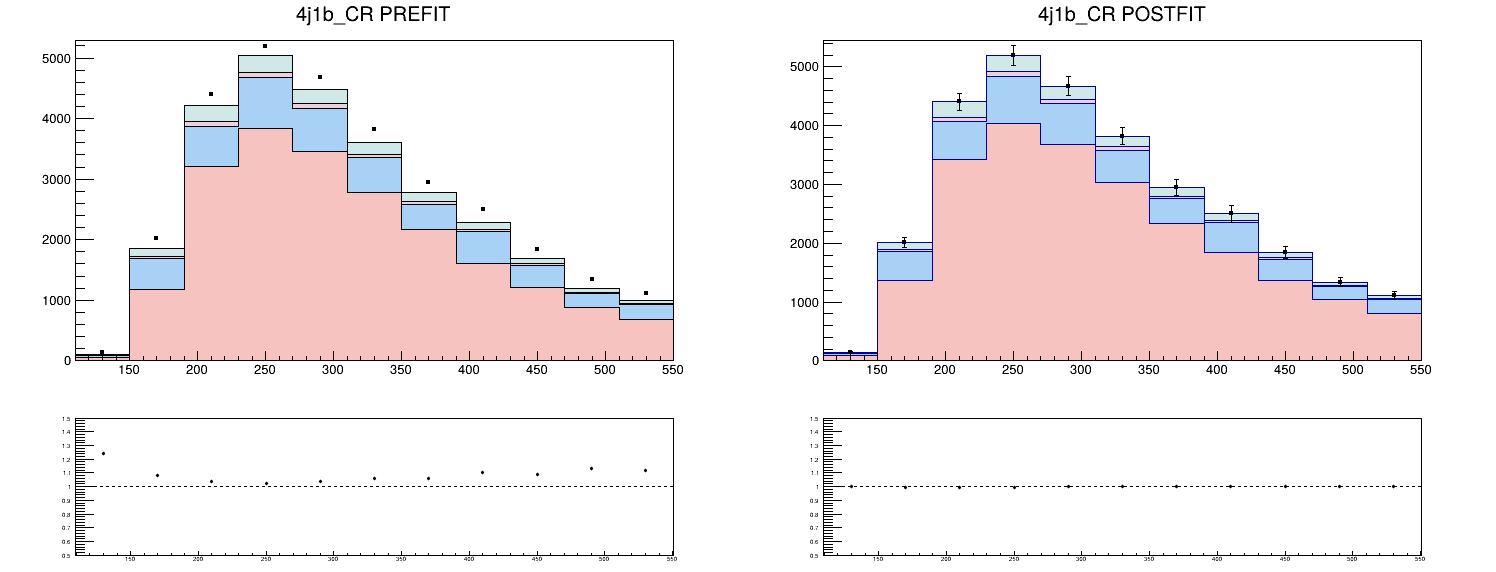

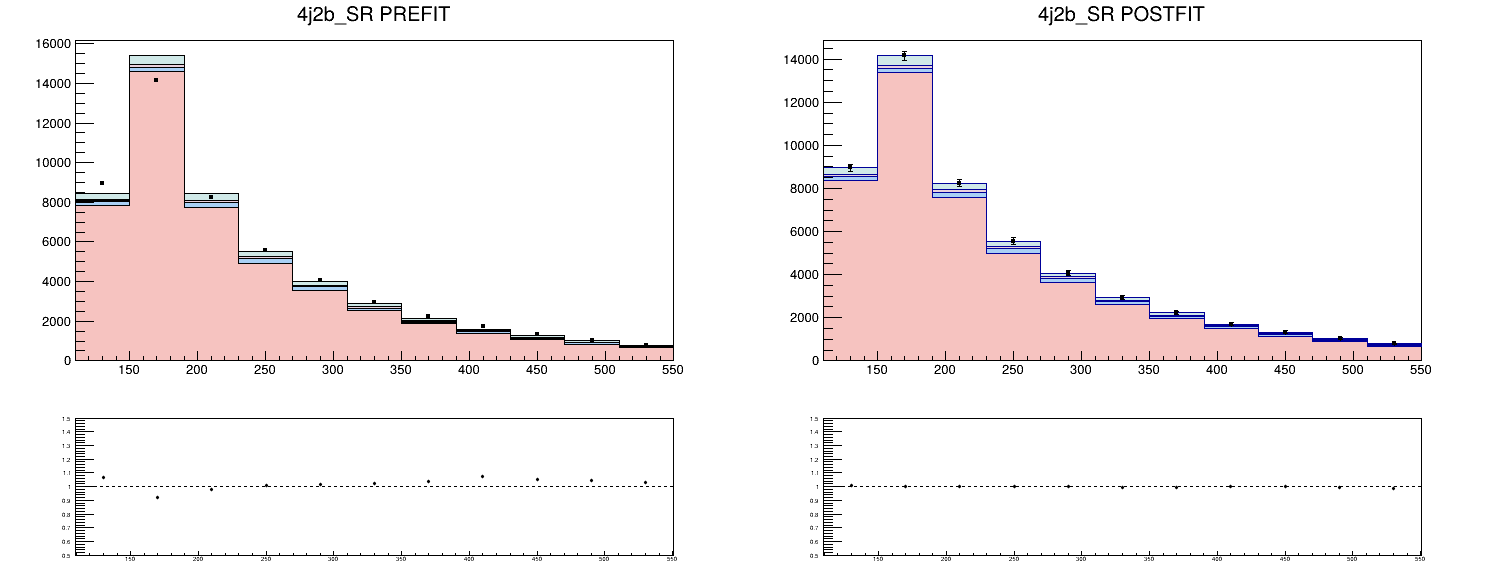

In [ ]:
md = DrawModel(meas, ws)
md.Draw(result)

In [ ]:
total_uncertanties_per_bin = []
# i = 0
for i, channel in enumerate(meas.GetChannels()):
    total_uncertanties_per_bin += [[0] * 11]
    # print(channel.GetName())
    for sample in channel.GetSamples():
        # print(sample.GetStatError().GetErrorHist())
        print(sample.GetName())
        # print(sample.GetStatError())
        # print(sample.GetStatError().GetHistoHigh())
        hist = sample.GetHisto()
        # print(hist)
        number_of_bins = hist.GetNbinsX()

        for j in range(number_of_bins):
            print(hist.GetBinError(j))
            total_uncertanties_per_bin[i][j] += hist.GetBinError(j + 1)
        print(number_of_bins)
    
    break

print(total_uncertanties_per_bin[0])



ttbar
0.0
4.834480360748466
21.367654956502783
35.15322557937435
38.51190833877265
36.51787545978305
32.77995952432599
28.888601680717272
24.9392961221418
21.548034464584237
18.491854674989924
11
wjets
0.0
17.69503621392078
66.79729687061102
77.13087465877325
85.77987063047627
79.6276629626435
70.78014485568312
61.29740352856403
67.95907608646932
57.33847067567866
44.237590534801946
11
single_top_s
0.0
0.017626435788563204
0.04663516559698692
0.06482675224349241
0.06814702054141512
0.061326985937727625
0.05859996412238517
0.050018817252308195
0.046106205210352975
0.045210853858712145
0.03706187148617743
11
single_top_t
0.0
0.7330019520124512
2.1798336866612384
3.1313857116597217
3.189822037367262
2.9491375028175875
2.8151474134399144
2.4551462426771096
2.2217940901322764
1.9821570922470653
1.644156220967767
11
single_top_tW
0.0
1.0872664390963966
4.112333682676955
5.906758320711116
6.003257841858146
5.561733611697298
4.857335690699282
4.4016016739344135
3.814051874123987
3.341367090723

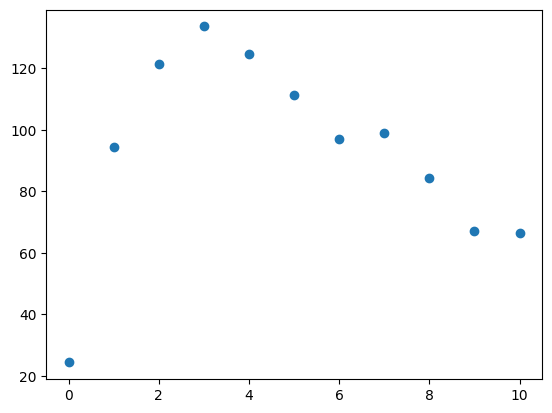

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(total_uncertanties_per_bin[0], marker='o', linestyle='None',)